In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import random as rnd

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Bilder laden

dataset = datasets.cifar10.load_data()
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [3]:
images, labels = [], []

class_names = ['Bottle opener', 'Can opener', 'Cork screw', 'Multitool']

relImgPath = os.path.join("data", "images", "augmented")
imgPaths = []
for dirpath, dirnames, filenames in os.walk(relImgPath):
    if dirnames:
        classes = {}
        for index, name in enumerate(dirnames):
            classes[name]=index
    for filename in filenames:# [f for f in 
        path = os.path.join(dirpath, filename)
        key = dirpath[dirpath.rindex('\\')+1:]
        images.append(cv2.imread(path, cv2.COLOR_BGR2RGB))
        labels.append([classes[key]])

In [4]:
images = np.array(images)
labels = np.array(labels)

In [15]:
p = np.random.permutation(len(images))
images = images[p]
labels = labels[p]

In [16]:
ratio = 0.66

train_images, train_labels = images[:int(len(images)*ratio)], labels[:int(len(images)*ratio)]
test_images, test_labels = images[int(len(images)*ratio):], labels[int(len(images)*ratio):]

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, batch_size=64, shuffle=True, use_multiprocessing=False,
                    validation_data=(test_images, test_labels), validation_split=0.5)

Epoch 1/15
294/294 [==============================] - 8s 28ms/step - loss: 1.7519 - accuracy: 0.4798 - val_loss: 1.1678 - val_accuracy: 0.5204
Epoch 2/15
294/294 [==============================] - 8s 27ms/step - loss: 1.1125 - accuracy: 0.5493 - val_loss: 1.1074 - val_accuracy: 0.5443
Epoch 3/15
294/294 [==============================] - 8s 27ms/step - loss: 1.0324 - accuracy: 0.5887 - val_loss: 1.0247 - val_accuracy: 0.5903
Epoch 4/15
294/294 [==============================] - 8s 27ms/step - loss: 0.9548 - accuracy: 0.6240 - val_loss: 0.9643 - val_accuracy: 0.6211
Epoch 5/15
294/294 [==============================] - 8s 27ms/step - loss: 0.8791 - accuracy: 0.6574 - val_loss: 0.8958 - val_accuracy: 0.6547
Epoch 6/15
294/294 [==============================] - 8s 28ms/step - loss: 0.7920 - accuracy: 0.6959 - val_loss: 0.8700 - val_accuracy: 0.6740
Epoch 7/15
294/294 [==============================] - 8s 27ms/step - loss: 0.7172 - accuracy: 0.7319 - val_loss: 0.7951 - val_accuracy: 0.7060

605/605 - 2s - loss: 0.7020 - accuracy: 0.7675


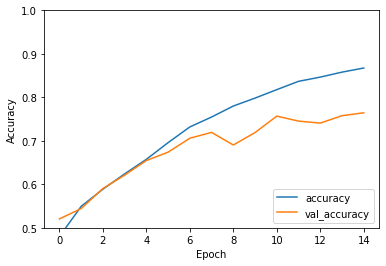

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [21]:
print(test_acc)

0.7675080299377441


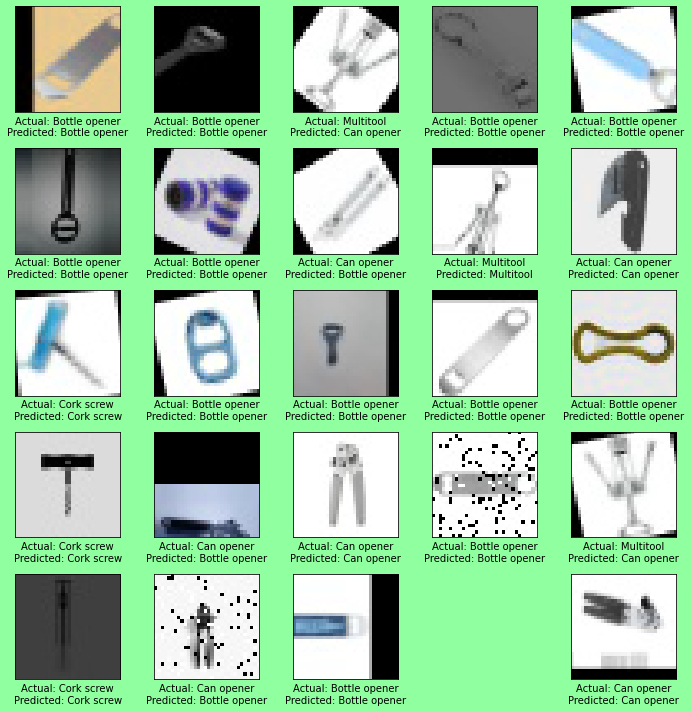

In [22]:
start = rnd.randint(0, len(test_images) - 25)

preds = model.predict(test_images[start:start+25])
index_max = []
for pred in preds:
    index_max.append(np.argmax(pred))

fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:mint green')
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i+start])
    plt.tight_layout()
    plt.xlabel(
        'Actual: ' + class_names[test_labels[i+start][0]] +
        '\nPredicted: ' + class_names[index_max[i]])

In [23]:
model.save('models/test')

INFO:tensorflow:Assets written to: models/test\assets
